In [250]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [251]:
# Cargar el dataset
ruta = '/Users/ferleon/Github/semestre_v/algoritmos_bioinspirados/data/data.xlsx'
df_polar = pl.read_excel(ruta)

In [252]:
df_polar.head()

x,y
f64,f64
-2.0,-177.0
-1.8,-124.54208
-1.6,-85.42816
-1.4,-56.81664
-1.2,-36.32672


$P(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4 + a_5x^5$

Coeficientes: [  1.  -4.   3. -14.   1.   1.]


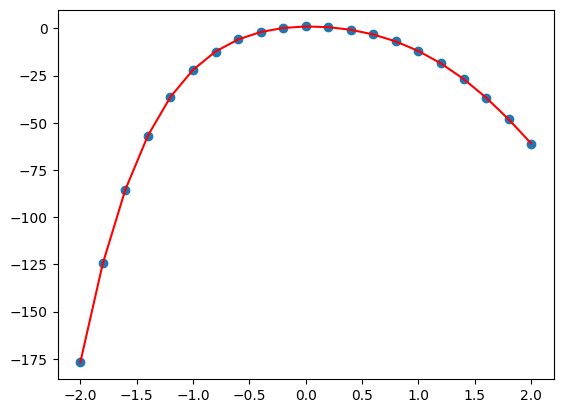

In [253]:


x = df_polar['x']
y = df_polar['y']

# Ajuste polinomial de grado 5
coef = np.polyfit(x, y, 5)
p = np.poly1d(coef)
print(f"Coeficientes: {coef}")

# Valores predichos
y_pred = p(x)

# Graficar
plt.scatter(x, y)          # puntos originales
plt.plot(x, y_pred, 'r')   # curva ajustada

plt.show()

In [254]:
# Crear la poblacion con un individuo con 5 genes (Uno para cada coeficiente) (Usamos representación real  [0,1])
def poblar(n_individuos, n_genes):
    poblacion = np.random.rand(n_individuos, n_genes)
    return poblacion

In [255]:
# Evaluar todos las soluciones candidatas en la población P(t)
def fitness(poblacion, x, y):
    aptitudes = []
    for individuo in poblacion:
        p = np.poly1d(individuo)
        y_pred = p(x)
        mse = mean_squared_error(y, y_pred)
        aptitudes.append(mse)
    return np.array(aptitudes)



In [256]:
# Seleccionar soluciones prometedoras S(t) de P(t)
def seleccionar(poblacion, aptitudes, n_seleccionados):
    indices = np.argsort(aptitudes)[:n_seleccionados]
    return poblacion[indices]

In [257]:
# Construir un modelo probabilístico M(t) para S(t)
def construir_modelo(seleccionados):
    media = np.mean(seleccionados, axis=0)
    desviacion = np.std(seleccionados, axis=0)
    return media, desviacion

In [258]:
# Generar una nueva soluciones O(t) muestreando M(t)
def muestrear_modelo(media, desviacion, n_nuevos):
    nuevos = np.random.normal(media, desviacion, (n_nuevos, len(media)))
    return nuevos

In [259]:
# Crear P(t + 1) combinando O(t) y P(t)
def crear_nueva_poblacion(antigua, nuevos):
    return np.vstack((antigua, nuevos))


# Algoritmo de Estimación de Distribución

1.  t ← 0
2.  generate population P(0) of random solutions
3.  while termination criteria not satisfied, repeat do
4.  ....evaluate all candidate solutions in P(t)
5.  ....select promising solutions S(t) from P(t)
6.  ....build a probabilistic model M(t) for S(t)
7.  ....generate new solutions O(t) by sampling M(t)
8.  ....create P(t + 1) by combining O(t) and P(t)
9.  ....t ← t + 1
10. end while


In [260]:
# Inizializar parámetros
n_individuos = 100
n_genes = 5
n_generaciones = 500
poblacion = poblar(n_individuos, n_genes)
n_seleccionados = n_individuos // 2
n_nuevos = n_individuos // 2    
t = 0

while t < n_generaciones:
    aptitudes = fitness(poblacion, x, y)
    seleccionados = seleccionar(poblacion, aptitudes, n_seleccionados)
    media, desviacion = construir_modelo(seleccionados)
    nuevos = muestrear_modelo(media, desviacion, n_nuevos)
    poblacion = crear_nueva_poblacion(poblacion, nuevos)
    print(f"Generación {t}, Mejor aptitud: {np.min(aptitudes)}")
    t += 1

# Evaluar la mejor solución encontrada
aptitudes_final = fitness(poblacion, x, y)
mejor_indice = np.argmin(aptitudes_final)
mejor_individuo = poblacion[mejor_indice]
print(f"Mejores coeficientes encontrados: {mejor_individuo}")
print(f"Sus coeficientes del mejor individuo son: {mejor_individuo}")

Generación 0, Mejor aptitud: 3180.419794842474
Generación 1, Mejor aptitud: 3147.5854388048197
Generación 2, Mejor aptitud: 3147.5854388048197
Generación 3, Mejor aptitud: 3063.6563622509816
Generación 4, Mejor aptitud: 3062.155573104102
Generación 5, Mejor aptitud: 2960.9930853800047
Generación 6, Mejor aptitud: 2960.9930853800047
Generación 7, Mejor aptitud: 2920.0809822598603
Generación 8, Mejor aptitud: 2897.7265058274447
Generación 9, Mejor aptitud: 2897.7265058274447
Generación 10, Mejor aptitud: 2871.888667000294
Generación 11, Mejor aptitud: 2834.820197626194
Generación 12, Mejor aptitud: 2831.8489594449265
Generación 13, Mejor aptitud: 2798.7259684441633
Generación 14, Mejor aptitud: 2759.849583273124
Generación 15, Mejor aptitud: 2736.3444157131607
Generación 16, Mejor aptitud: 2736.3444157131607
Generación 17, Mejor aptitud: 2721.8593207873046
Generación 18, Mejor aptitud: 2721.8593207873046
Generación 19, Mejor aptitud: 2716.0631347997205
Generación 20, Mejor aptitud: 2701.

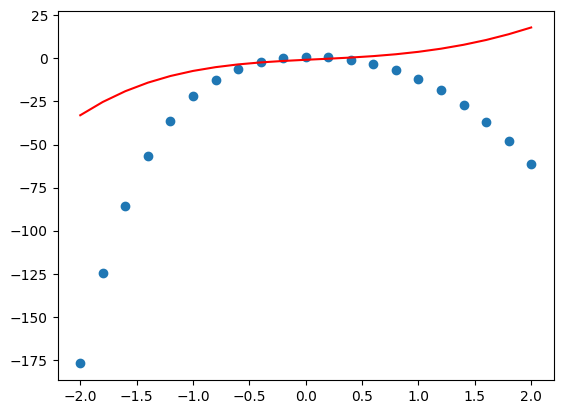

In [263]:
# Gráficar el mejor ajuste encontrado
p_mejor = np.poly1d(mejor_individuo)
y_mejor_pred = p_mejor(x)
plt.scatter(x, y)          # puntos originales
plt.plot(x, y_mejor_pred, color='r')  # mejor ajuste

Grado 1: R2=0.213, MSE=1585.682


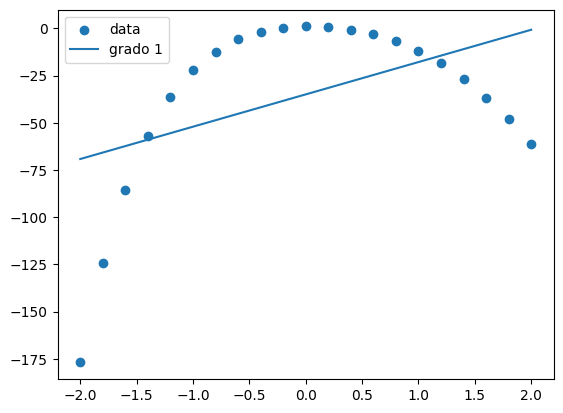

Grado 2: R2=0.925, MSE=151.113


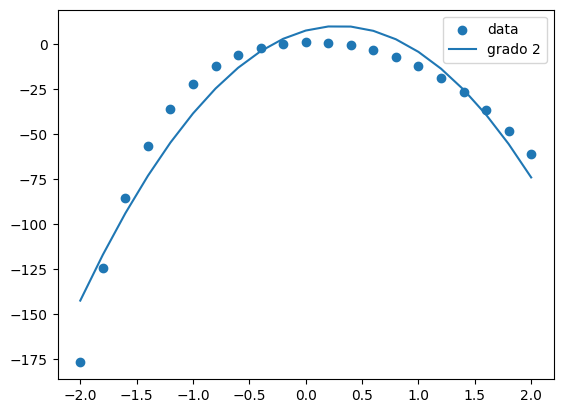

Grado 3: R2=0.983, MSE=34.942


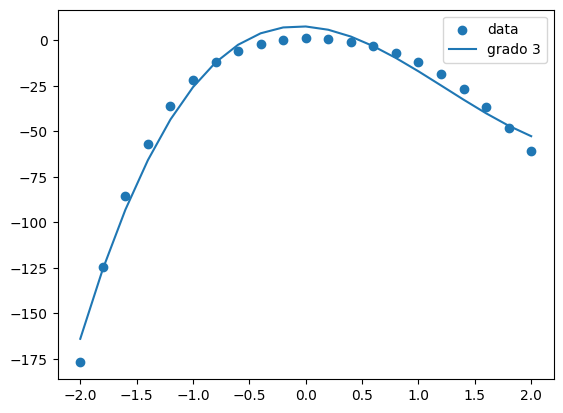

Grado 4: R2=0.999, MSE=2.153


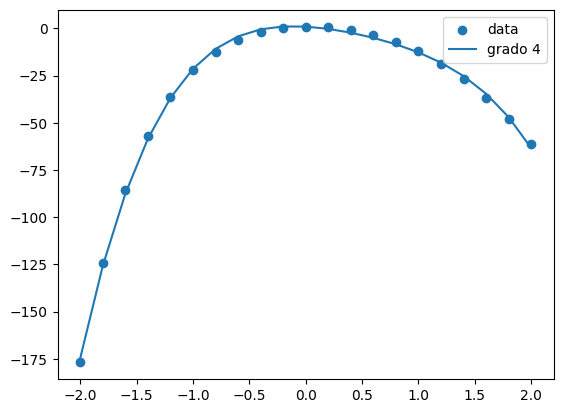

Grado 5: R2=1.000, MSE=0.000


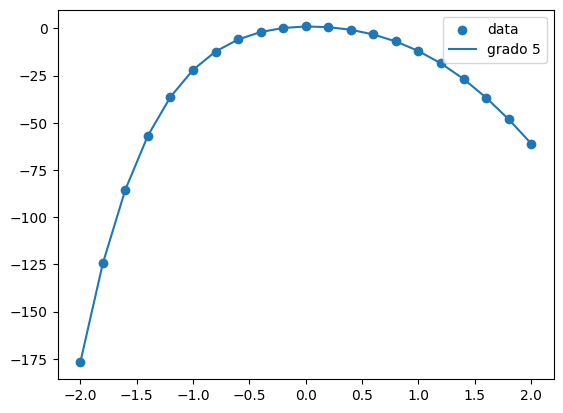

In [261]:



for grado in range(1, 6):
    coef = np.polyfit(x, y, grado)
    p = np.poly1d(coef)
    y_pred = p(x)

    # métricas de ajuste
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    print(f"Grado {grado}: R2={r2:.3f}, MSE={mse:.3f}")

    # gráfica
    plt.scatter(x, y, label="data")
    plt.plot(x, y_pred, label=f"grado {grado}")
    plt.legend()
    plt.show()

In [ ]:
def BUMDA_MEDIA_STDS(poblacion_elite, g,min,max,beta):
    m,d = poblacion_elite.shape

    Z = m/((max-min) * np.sum(np.exp(beta*g)))
    
    mu = np.zeros(d)
    sigma = np.zeros(d)
    
    for j in range(d):
        xj = poblacion_elite[:,j]
        # Media
        mu_term1 = (1 / (Z * beta)) * np.sum(np.exp(beta*g) * xj)
        denom_mu = (m / ((max-min) * beta) * beta) + np.sum(g)
        mu_termin2 = np.sum(g * xj) / denom_mu
        mu[j] = mu_term1 + mu_termin2
        
        # Varianza
        va_term1 = (1 / (Z * beta)) * np.sum(np.exp(beta*g) * (xj - mu[j])**2)
        var_term2 = np.sum(g * (xj - mu[j])**2) / np.sum(g)
        varianza = va_term1 + var_term2
        sigma[j] = np.sqrt(varianza)
        
    return mu, sigma